In [62]:
import numpy as np
from shpm2 import SHPM
from evo import evo_alg
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
import random

from copy import deepcopy

In [63]:
def plot_matrix_grid(As: list):
    # find the size of the list grid:    

    # As = [A if A is list else [A] for A in As]    

    rows = len(As)
    cols = np.max([len(As[idx]) for idx in range(len(As))])
    
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))    

    for row_idx in range(len(As)):
        for col_idx in range(len(As[row_idx])):
            A = As[row_idx][col_idx]
            ax = axs[row_idx, col_idx] if cols > 1 and rows > 1\
                else axs[col_idx] if cols > 1\
                else axs[row_idx]

            im = ax.imshow(A, cmap="inferno", norm=CenteredNorm())
            plt.colorbar(im, ax=ax)
    
    fig.show()
    return

def plot_matrix_spectra(A, B):

    A_eigs = np.linalg.eigvals(A)
    B_eigs = np.linalg.eigvals(B)

    A_eigs_real = np.real(A_eigs)
    B_eigs_real = np.real(B_eigs)
    A_eigs_imag = np.imag(A_eigs)
    B_eigs_imag = np.imag(B_eigs)

    xmin = np.min([np.min(A_eigs_real), np.min(B_eigs_real)])
    xmax = 1.0

    ymin = np.min([-5.0, np.min(A_eigs_imag), np.min(B_eigs_imag)])
    ymax = -ymin

    plt.scatter(A_eigs_real, A_eigs_imag, c="red", marker="x")
    plt.scatter(B_eigs_real, B_eigs_imag, c="blue", marker=".")

    plt.vlines([0.0], ymin=ymin, ymax=ymax, colors="black", linestyles="--")
    plt.xlim((xmin, xmax))
    plt.ylim((ymin, ymax))

    plt.show()
    return

In [64]:
random.seed(42)

In [65]:
n = 10
m = 4 # parents
l = 100 # population size
max_iters = 500

In [66]:
shpm = SHPM(n)

In [67]:
# generate a random target matrix 
P_target = shpm.random_point()
A_target = shpm.assemble(P_target)
A_target_norm = np.linalg.norm(A_target)
H_target = shpm.hberg.assemble(P_target[1])
Q_target = P_target[0]

In [68]:
def objective(p):
    A = shpm.assemble(p)    
    A_norm = np.linalg.norm(A)

    distance = np.linalg.norm(A - A_target) / A_target_norm
    return distance

In [69]:
# create initial population:
# p = [shpm.random_point() for i in range(l)]
# p = [shpm.mutate(deepcopy(P_target), mag=1.0) for i in range(l)]
p = [shpm.mutate(deepcopy(best), mag=1.0) for i in range(l)]

In [70]:
# run the evolutionary algorithm:
best, best_fitness, iters_taken, population_objectives = evo_alg(
    p, m, l, objective, shpm.mutate, shpm.crossover, s=0.1, maxiter=max_iters
)

In [71]:
q = 0.2
bests = np.array([l[0] for l in population_objectives])
fitness_stds = np.array([np.std(l) for l in population_objectives])
avgs = np.array([np.average(l) for l in population_objectives])
fitness_quantile = np.array([np.quantile(l, q) for l in population_objectives])

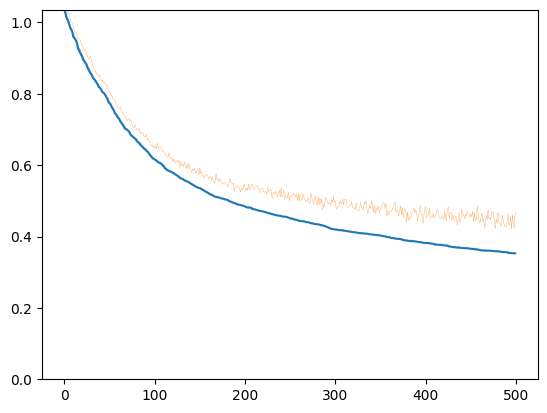

In [72]:
plt.plot(bests)
plt.plot(avgs, linewidth=0.2)
# plt.plot(fitness_quantile)
plt.fill_between(np.arange(len(bests)), bests, fitness_quantile, alpha=0.5)
# plt.ylim((0.0, np.max([np.max(bests), np.max(avgs)])))
plt.ylim((0.0, np.max(bests)))
plt.show()

/var/folders/gl/fvh30ch934sdznjzhnxdxm4m0000gn/T/ipykernel_5893/3748979853.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


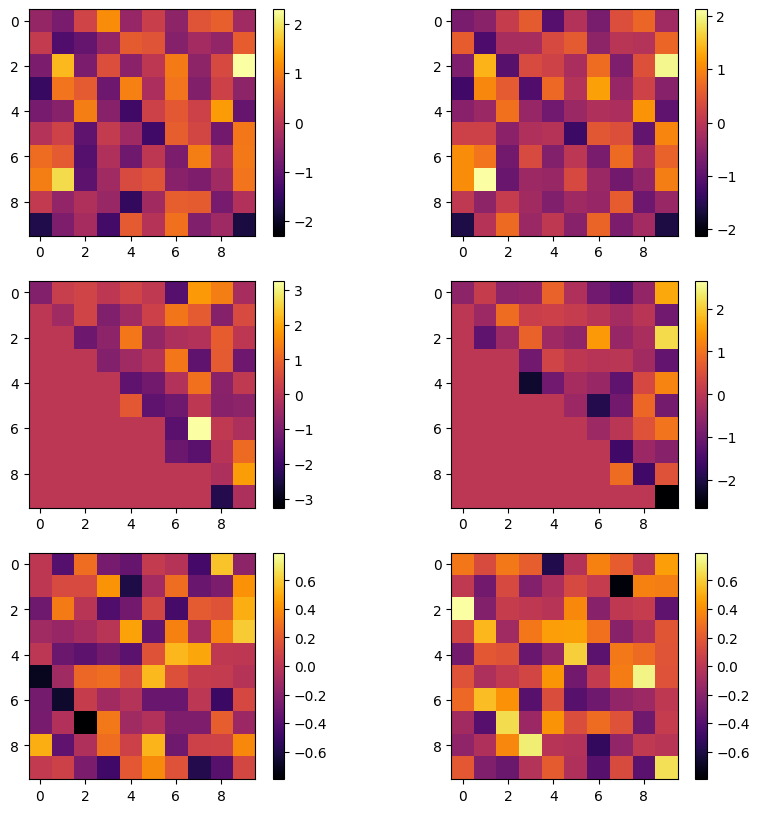

In [73]:
plot_matrix_grid(
    [
        [A_target, shpm.assemble(best)], 
        [H_target, shpm.hberg.assemble(best[1])], 
        [Q_target, best[0]]
    ]
)

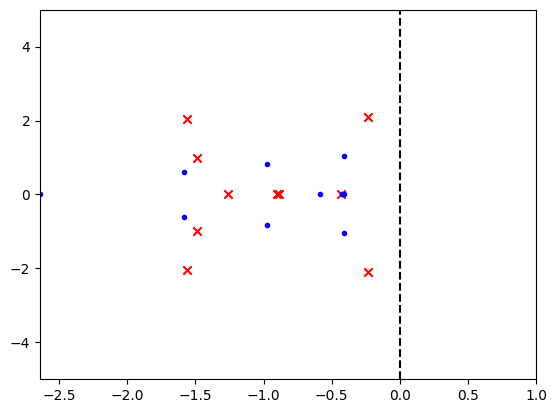

In [74]:
plot_matrix_spectra(A_target, shpm.assemble(best))

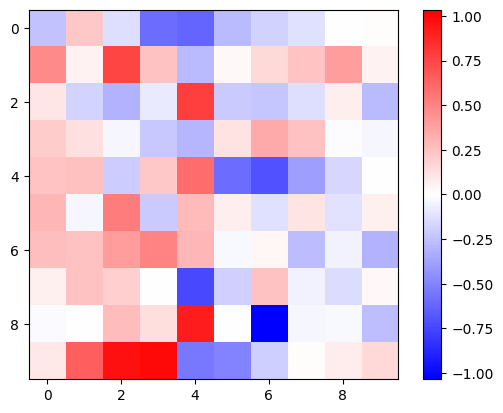

In [75]:
plt.imshow(shpm.assemble(best) - A_target, cmap="bwr", norm=CenteredNorm())
plt.colorbar()